<a href="https://colab.research.google.com/github/trishthefish28/Balloon-Game/blob/main/Gap_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Must upload dataset file into Colab
from google.colab import files
uploaded = files.upload()



Saving final dataset - Sheet1.csv to final dataset - Sheet1.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

compiled_dataset = pd.read_csv('final dataset - Sheet1.csv')
compiled_dataset.describe()

data = {
    'Year': [1970, 1980, 1990, 2000],
    'Female % Astro': ['15.79%', '13.75%', '19.01%', '18.92%'],
    'Female % military': ['1.10%', '8.50%', '11.30%', '14.70%'],
    'Female % STEM': ['7.00%', '14.00%', '23.00%', '25.00%'],
    'White % Astro': ['89.50%', '90.80%', '~85.6%', '86.10%'],
    'White % military': [80, 75, 70, 65],
    'White % STEM': [90, 85, 80, 75],
    'African American % Astro': ['7.90%', '3.90%', '~5.4%', '~5.6%'],
    'African American % military': [12, 15, 20, 19],
    'African American % STEM': [10, 10, 10, 12],
    'Asian % Astro': ['2.60%', '3.90%', '~3.6%', '~2.8%'],
    'Asian % military': [2, 2, 2, 2],
    'Asian % STEM': [2, 4, 8, 15],
    'Latino % Astro': ['0%', '1.30%', '~4.5%', '~5.6%'],
    'Latino % military': [4, 5, 6, 11],
    'Latino % STEM': [5, 8, 10, 12]
}

compiled_dataset = pd.DataFrame(data)


#convert percentage strings to numeric
def clean_percent(x):
  if isinstance(x,str):
    x = x.replace('~', '').replace('%','')
    return float(x)
  return x

for col in compiled_dataset.columns[1:]:
  compiled_dataset[col] = compiled_dataset[col].apply(clean_percent)
compiled_dataset

compiled_dataset

,Year,Female % Astro,Female % military,Female % STEM,White % Astro,White % military,White % STEM,African American % Astro,African American % military,African American % STEM,Asian % Astro,Asian % military,Asian % STEM,Latino % Astro,Latino % military,Latino % STEM
0,1970,15.79,1.1,7.0,89.5,80,90,7.9,12,10,2.6,2,2,0.0,4,5
1,1980,13.75,8.5,14.0,90.8,75,85,3.9,15,10,3.9,2,4,1.3,5,8
2,1990,19.01,11.3,23.0,85.6,70,80,5.4,20,10,3.6,2,8,4.5,6,10
3,2000,18.92,14.7,25.0,86.1,65,75,5.6,19,12,2.8,2,15,5.6,11,12


In [ ]:
#creates new data frame for just the representational gaps
gap_dataset = pd.DataFrame({'Year': [1970, 1980, 1990, 2000]})

gap_dataset['Female Gap versus STEM'] = compiled_dataset['Female % Astro'] - compiled_dataset['Female % STEM']
gap_dataset['Female Gap versus Military'] = compiled_dataset['Female % Astro'] - compiled_dataset['Female % military']
gap_dataset['White Gap versus STEM'] = compiled_dataset['White % Astro'] - compiled_dataset['White % STEM']
gap_dataset['White Gap versus Military'] = compiled_dataset['White % Astro'] - compiled_dataset['White % military']
gap_dataset['African American Gap versus STEM'] = compiled_dataset['African American % Astro'] - compiled_dataset['African American % STEM']
gap_dataset['African American Gap versus Military'] = compiled_dataset['African American % Astro'] - compiled_dataset['African American % military']
gap_dataset['Asian Gap versus STEM'] = compiled_dataset['Asian % Astro'] - compiled_dataset['Asian % STEM']
gap_dataset['Asian Gap versus Military'] = compiled_dataset['Asian % Astro'] - compiled_dataset['Asian % military']
gap_dataset['Latino Gap versus STEM'] = compiled_dataset['Latino % Astro'] - compiled_dataset['Latino % STEM']
gap_dataset['Latino Gap versus Military'] = compiled_dataset['Latino % Astro'] - compiled_dataset['Latino % military']

gap_dataset

,Year,Female Gap versus STEM,Female Gap versus Military,White Gap versus STEM,White Gap versus Military,African American Gap versus STEM,African American Gap versus Military,Asian Gap versus STEM,Asian Gap versus Military,Latino Gap versus STEM,Latino Gap versus Military
0,1970,8.79,14.69,-0.5,9.5,-2.1,-4.1,0.6,0.6,-5.0,-4.0
1,1980,-0.25,5.25,5.8,15.8,-6.1,-11.1,-0.1,1.9,-6.7,-3.7
2,1990,-3.99,7.71,5.6,15.6,-4.6,-14.6,-4.4,1.6,-5.5,-1.5
3,2000,-6.08,4.22,11.1,21.1,-6.4,-13.4,-12.2,0.8,-6.4,-5.4


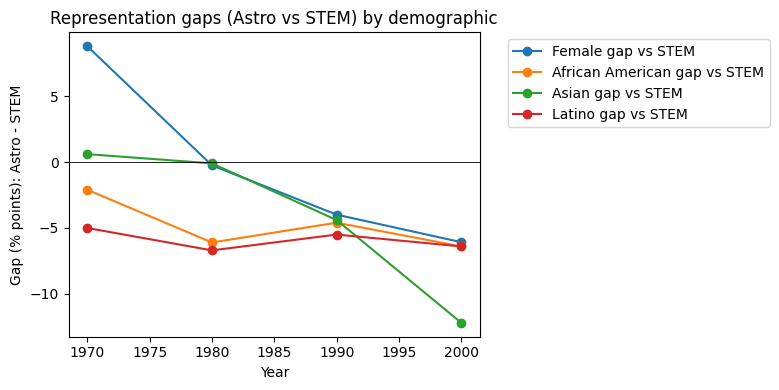

In [ ]:
import statsmodels.api as sm

plt.figure(figsize=(8,4))
for g in ["Female","African American","Asian","Latino"]:
    plt.plot(gap_dataset['Year'], gap_dataset[f"{g} Gap versus STEM"], marker='o', label=f"{g} gap vs STEM")
plt.axhline(0, color='black', linewidth=0.6)
plt.xlabel("Year")
plt.ylabel("Gap (% points): Astro - STEM")
plt.title("Representation gaps (Astro vs STEM) by demographic")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

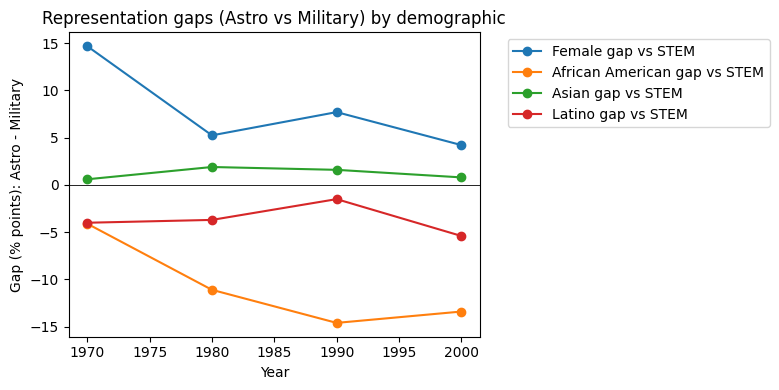

In [ ]:
plt.figure(figsize=(8,4))
for g in ["Female","African American","Asian","Latino"]:
    plt.plot(gap_dataset['Year'], gap_dataset[f"{g} Gap versus Military"], marker='o', label=f"{g} gap vs STEM")
plt.axhline(0, color='black', linewidth=0.6)
plt.xlabel("Year")
plt.ylabel("Gap (% points): Astro - Military")
plt.title("Representation gaps (Astro vs Military) by demographic")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#observing trend test models for representation gap size in STEM over time
#gaps are surrounded by absolute value bars in order to judge gaps solely by magnitude

y = abs(gap_dataset["Female Gap versus STEM"])
X = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(y, X).fit()
print(model.summary())

a = abs(gap_dataset["African American Gap versus STEM"])
b = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(a, b).fit()
print(model.summary())

c = abs(gap_dataset["Asian Gap versus STEM"])
d = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(c, d).fit()
print(model.summary())

e = abs(gap_dataset["Latino Gap versus STEM"])
f = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(e, f).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Female Gap versus STEM   R-squared:                       0.025
Model:                                OLS   Adj. R-squared:                 -0.463
Method:                     Least Squares   F-statistic:                   0.05078
Date:                    Sun, 21 Sep 2025   Prob (F-statistic):              0.843
Time:                            12:46:31   Log-Likelihood:                -10.176
No. Observations:                       4   AIC:                             24.35
Df Residuals:                           2   BIC:                             23.12
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
#serving trend test models for representation gap size in military over time
#gaps are surrounded by absolute value bars in order to judge gaps solely by magnitude

y = abs(gap_dataset["Female Gap versus Military"])
X = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(y, X).fit()
print(model.summary())

a = abs(gap_dataset["African American Gap versus Military"])
b = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(a, b).fit()
print(model.summary())

c = abs(gap_dataset["Asian Gap versus Military"])
d = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(c, d).fit()
print(model.summary())

e = abs(gap_dataset["Latino Gap versus Military"])
f = sm.add_constant(gap_dataset["Year"])
model = sm.OLS(e, f).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Female Gap versus Military   R-squared:                       0.628
Model:                                    OLS   Adj. R-squared:                  0.443
Method:                         Least Squares   F-statistic:                     3.382
Date:                        Sun, 21 Sep 2025   Prob (F-statistic):              0.207
Time:                                13:44:25   Log-Likelihood:                -9.3234
No. Observations:                           4   AIC:                             22.65
Df Residuals:                               2   BIC:                             21.42
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [ ]:
import numpy as np
from scipy import stats

#bootstrap sample function -- pulled code from ai agent
def bootstrap_mean(arr, n_boot=10000, seed=1):
    rng = np.random.default_rng(seed)
    boot_means = []
    n = len(arr)
    for _ in range(n_boot):
        sample = rng.choice(arr, size=n, replace=True)
        boot_means.append(np.mean(sample))
    low = np.percentile(boot_means, 2.5)
    high = np.percentile(boot_means, 97.5)
    return np.mean(arr), (low, high)

#applying bootstrap mean function to STEM representation gaps
mean_gap, ci = bootstrap_mean(gap_dataset["Female Gap versus STEM"].values)
print("Female gap mean:", mean_gap, "95% CI:", ci)

mean_gap_2, ci_2 = bootstrap_mean(gap_dataset["African American Gap versus STEM"].values)
print("Afican American Gap mean:", mean_gap_2, "95% CI:", ci_2)

mean_gap_3, ci_3 = bootstrap_mean(gap_dataset["Asian Gap versus STEM"].values)
print("Asian Gap mean:", mean_gap_3, "95% CI:", ci_3)

mean_gap_4, ci_4 = bootstrap_mean(gap_dataset["Latino Gap versus STEM"].values)
print("Latino Gap mean:", mean_gap_4, "95% CI:", ci_4)

#applying stats library ttest function to STEM representation gaps
tstat, pval = stats.ttest_1samp(gap_dataset["Female Gap versus STEM"], 0.0)
print("One-sample t-test on Female gap vs 0: t=", tstat, "p=", pval)

tstat2, pval2 = stats.ttest_1samp(gap_dataset["African American Gap versus STEM"], 0.0)
print("One-sample t-test on African American gap vs 0: t=", tstat2, "p=", pval2)

tstat3, pval3 = stats.ttest_1samp(gap_dataset["Asian Gap versus STEM"], 0.0)
print("One-sample t-test on Asian gap vs 0: t=", tstat3, "p=", pval3)

tstat4, pval4 = stats.ttest_1samp(gap_dataset["Latino Gap versus STEM"], 0.0)
print("One-sample t-test on Latino gap vs 0: t=", tstat4, "p=", pval4)

#applying bootstrap mean function to Military representation gaps
mean_gap_5, ci_5 = bootstrap_mean(gap_dataset["Female Gap versus Military"].values)
print("Female Military gap mean:", mean_gap_5, "95% CI:", ci_5)

mean_gap_6, ci_6 = bootstrap_mean(gap_dataset["African American Gap versus Military"].values)
print("Afican American Military Gap mean:", mean_gap_6, "95% CI:", ci_6)

mean_gap_7, ci_7 = bootstrap_mean(gap_dataset["Asian Gap versus Military"].values)
print("Asian Military Gap mean:", mean_gap_7, "95% CI:", ci_7)

mean_gap_8, ci_8 = bootstrap_mean(gap_dataset["Latino Gap versus Military"].values)
print("Latino Military Gap mean:", mean_gap_8, "95% CI:", ci_8)

#applying stats library ttest function to Military representation gaps
tstat5, pval5 = stats.ttest_1samp(gap_dataset["Female Gap versus Military"], 0.0)
print("One-sample t-test on Female Military gap vs 0: t=", tstat5, "p=", pval5)

tstat6, pval6 = stats.ttest_1samp(gap_dataset["African American Gap versus Military"], 0.0)
print("One-sample t-test on African American Military gap vs 0: t=", tstat6, "p=", pval6)

tstat7, pval7 = stats.ttest_1samp(gap_dataset["Asian Gap versus Military"], 0.0)
print("One-sample t-test on Asian Military gap vs 0: t=", tstat7, "p=", pval7)

tstat8, pval8 = stats.ttest_1samp(gap_dataset["Latino Gap versus Military"], 0.0)
print("One-sample t-test on Latino gap vs 0: t=", tstat8, "p=", pval8)

Female gap mean: -0.3824999999999994 95% CI: (np.float64(-5.034999999999998), np.float64(5.595))
Afican American Gap mean: -4.8 95% CI: (np.float64(-6.25), np.float64(-3.0999999999999996))
Asian Gap mean: -4.025 95% CI: (np.float64(-9.175), np.float64(0.25))
Latino Gap mean: -5.9 95% CI: (np.float64(-6.550000000000001), np.float64(-5.25))
One-sample t-test on Female gap vs 0: t= -0.11637852851203734 p= 0.9147059846440908
One-sample t-test on African American gap vs 0: t= -4.88627134616916 p= 0.016392468424613667
One-sample t-test on Asian gap vs 0: t= -1.3687553537242194 p= 0.2645594626728564
One-sample t-test on Latino gap vs 0: t= -14.986014986022479 p= 0.0006449024645365364
Female Military gap mean: 7.9675 95% CI: (np.float64(4.735000000000001), np.float64(12.329999999999998))
Afican American Military Gap mean: -10.799999999999999 95% CI: (np.float64(-14.0), np.float64(-6.425))
Asian Military Gap mean: 1.2249999999999999 95% CI: (np.float64(0.7), np.float64(1.75))
Latino Military Ga